## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1 : Reading the Dataset

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


### How data looks in scatter plot

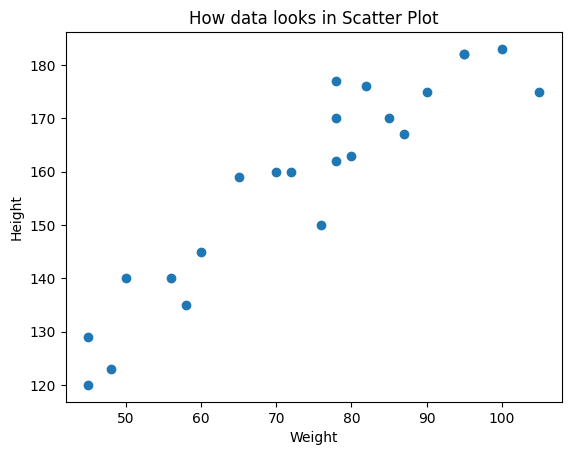

In [3]:
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('How data looks in Scatter Plot')
plt.show()

### Problem Statement :

Our Main Objective is to find the best fit line using model.

### Step 2 : Divide the feature based on Independent and Dependent Features

In [4]:
X = df[['Weight']]
y = df[['Height']]

### Step 3 : Train , Test and Split

In [5]:
from sklearn.model_selection import train_test_split

"""
-> X_train are Independent Feature.
-> y_train are dependent feature for training dataset.
-> For training the model we'll be taking X_train and y_train.
-> test_size = 0.20 means 20 percentage of the data points in
    this X, It will be considered as a test data. 
    So if there are 100 records in X out of that, if 
    We write 0.20 as test size, then 20 records will be
    put in the test data, okay.
-> random_state = 42 (seed value)

"""
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
X.shape , X_train.shape , X_test.shape

((23, 1), (18, 1), (5, 1))

In [7]:
y.shape , y_train.shape , y_test.shape

((23, 1), (18, 1), (5, 1))

### Step 4 : Standardize the Data

In [8]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

Scaled_X_train = Scaler.fit_transform(X_train)
Scaled_X_test = Scaler.transform(X_test)

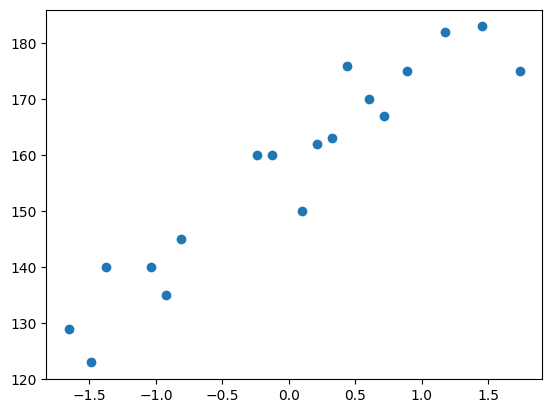

In [9]:
plt.scatter(Scaled_X_train,y_train)

### Step 5 : Train the Simple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

linear_Regression = LinearRegression()

model = linear_Regression.fit(Scaled_X_train,y_train)

y_pred = linear_Regression.predict(Scaled_X_test)

In [11]:
print('The slope or Co-efficient of Weight is : ', linear_Regression.coef_)
print('The Intercept : ', linear_Regression.intercept_)

The slope or Co-efficient of Weight is :  [[17.03440872]]
The Intercept :  [157.5]


### Plot using Test Data

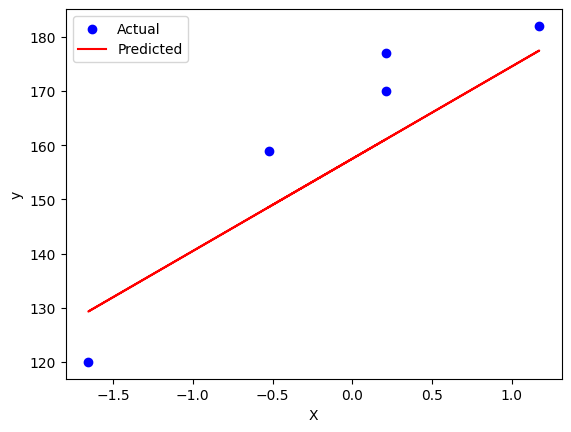

In [12]:
plt.scatter(Scaled_X_test, y_test, color='blue', label='Actual')
plt.plot(Scaled_X_test, y_pred, color='red', label='Predicted')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Plot using Train Data

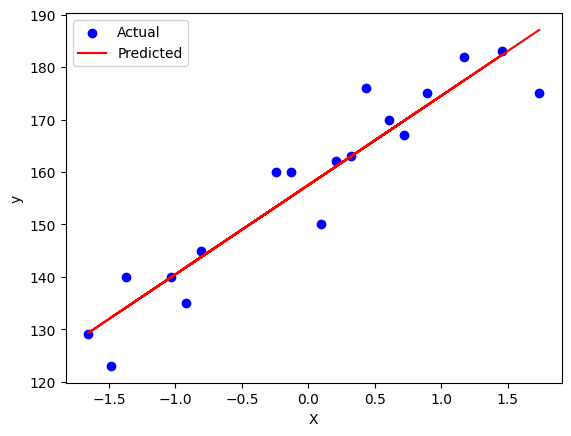

In [13]:
y_train_pred = model.predict(Scaled_X_train)

plt.scatter(Scaled_X_train, y_train, color='blue', label='Actual')
plt.plot(Scaled_X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### Performance Matrix

In [18]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 9.822657814519232
Mean Squared Error (MSE): 109.77592599051664
Root Mean Squared Error (RMSE): 10.477400726827081
R² Score: 0.776986986042344


### Predict a new data point

In [28]:
# Example new data point 
new_data = np.array([[80]])

# IMPORTANT: scale it using the same scaler you used for training
new_data_scaled = Scaler.transform(new_data)

# Predict using your trained model
prediction = model.predict(new_data_scaled)

print(f"Predicted height for {new_data[0][0]} kg is {prediction[0][0]:.2f} cm")


Predicted height for 80 kg is 163.01 cm


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


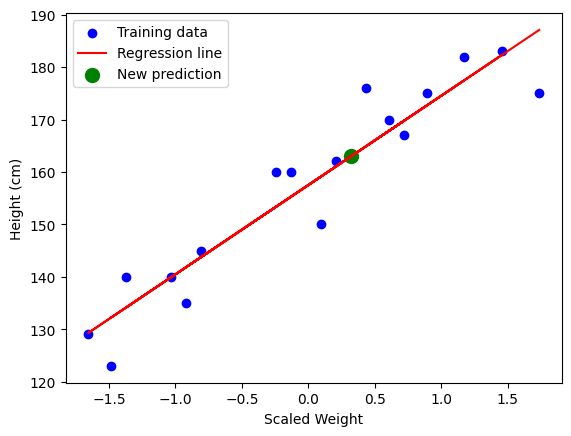

In [31]:
# Plot training data
plt.scatter(Scaled_X_train, y_train, color='blue', label='Training data')

# Plot regression line
plt.plot(Scaled_X_train, model.predict(Scaled_X_train), color='red', label='Regression line')

# Plot the new prediction point
plt.scatter(Scaler.transform([[80]]), [[163.01076266]], color='green', s=100, label='New prediction')

plt.xlabel("Scaled Weight")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()